# Confidence of transcription

Hack to visualize the confidence at each token

In [9]:
import os
import matplotlib.pyplot as plt
import sys
import torch
%matplotlib inline

# allow import from parent directory (we are not in a module)
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import whisper

## Clear speech example

In [2]:
model = whisper.load_model("base.en")

# load audio and pad/trim it to fit 30 seconds
audio = whisper.load_audio("../tests/clear.m4a")
audio = whisper.pad_or_trim(audio)

# make log-Mel spectrogram and move to the same device as the model
mel = whisper.log_mel_spectrogram(audio).to(model.device)

In [3]:
# decode the audio
options = whisper.DecodingOptions(
    language='en',
    task='transcribe',
    fp16=False,  # needed for m1 macs?
    beam_size=None,  # use greedy decoder
)
result = whisper.decode(model, mel, options)

In [12]:
probability = torch.exp(torch.tensor(result.avg_logprob)).item()  # convert log probability to probability
print(f'{probability=:.2%}')
print(f'{result.text=}')

probability=75.59%
result.text="Hello, can you understand what I'm saying or is it hard to understand?"


<BarContainer object of 18 artists>

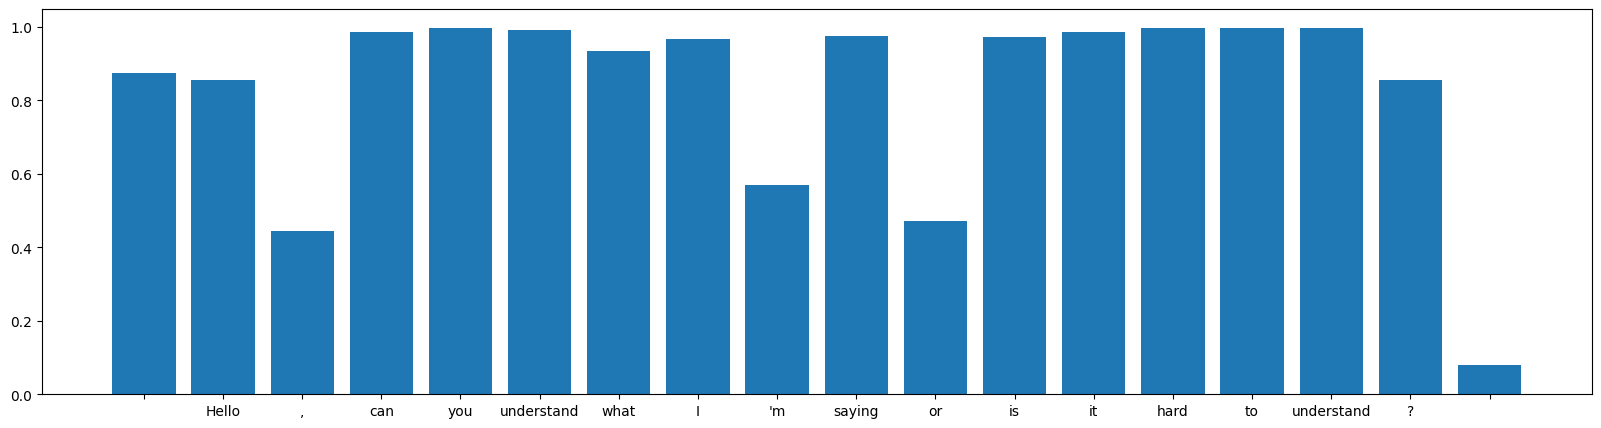

In [13]:
token_probability = list(
    zip(
        result.text_tokens,
        torch.exp(result.token_logprobs)
    )
)

# Plot the confidence of each token using matplotlib, with a bar chart indicating the probability of each token and a text label indicating the token itself.
plt.figure(figsize=(20, 5))
plt.bar(
    range(len(token_probability)),
    [p for _, p in token_probability],
    tick_label=[t for t, _ in token_probability],
)

## Mumbling speech example

In [5]:
# load audio and pad/trim it to fit 30 seconds
audio = whisper.load_audio("../tests/mumble.m4a")
audio = whisper.pad_or_trim(audio)

# make log-Mel spectrogram and move to the same device as the model
mel = whisper.log_mel_spectrogram(audio).to(model.device)

In [6]:
# decode the audio
options = whisper.DecodingOptions(
    language='en',
    fp16=False,  # needed for m1 macs?
    beam_size=None,  # use greedy decoder
)
result = whisper.decode(model, mel, options)

In [7]:
probability = torch.exp(torch.tensor(result.avg_logprob)).item()  # convert log probability to probability
print(f'{probability=:.2%}')
print(f'{result.text=}')
print(f'{result.token_logprobs=}')

probability=75.59%
result.text="Hello, can you understand what I'm saying or is it hard to understand?"
result.token_logprobs=tensor([-1.3410e-01, -1.5779e-01, -8.1193e-01, -1.3435e-02, -2.1775e-03,
        -7.9003e-03, -6.9504e-02, -3.4871e-02, -5.6451e-01, -2.4890e-02,
        -7.5254e-01, -2.8792e-02, -1.5252e-02, -4.1889e-03, -2.5674e-03,
        -3.4080e-03, -1.5639e-01, -2.5255e+00, -7.9235e-03])


<BarContainer object of 18 artists>

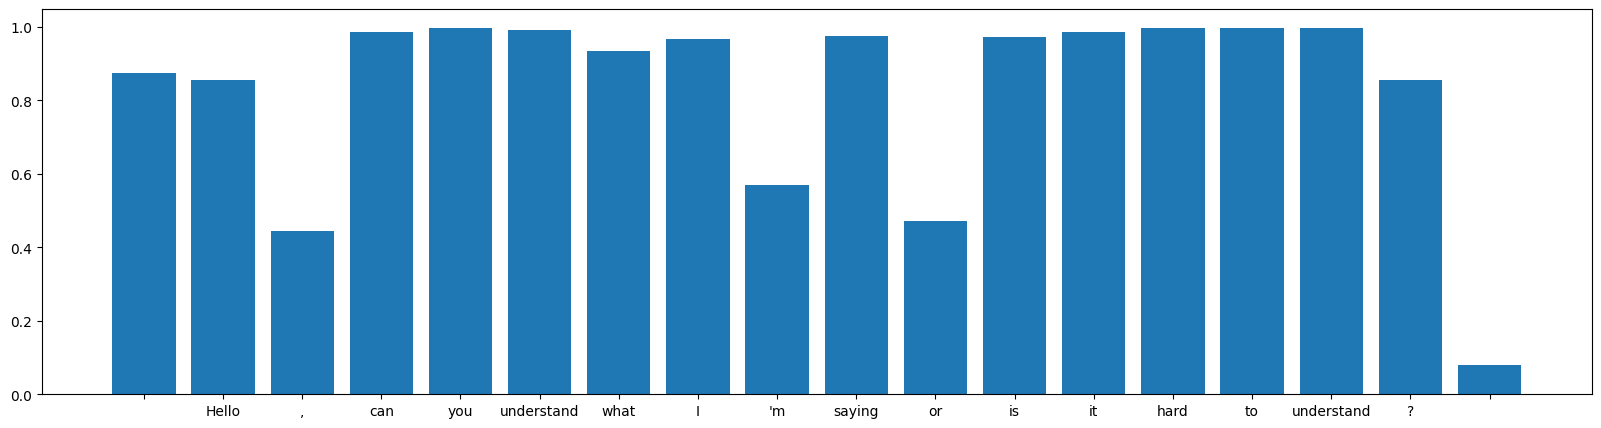

In [17]:
token_probability = list(
    zip(
        result.text_tokens,
        torch.exp(result.token_logprobs)
    )
)

# Plot the confidence of each token using matplotlib, with a line chart indicating the probability of each token and a text label indicating the token itself.
plt.figure(figsize=(20, 5))
plt.bar(
    range(len(token_probability)),
    [p for _, p in token_probability],
    tick_label=[t for t, _ in token_probability],
)